In [296]:
#Import required packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
#model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
# Suppressing Warnings
import warnings
warnings.filterwarnings ('ignore')
plt.style.use("ggplot")


STEP 1: IMPORTING DATA

In [297]:
case_df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
case_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


STEP 2: INSPECTING THE DATAFRAME

In [298]:
case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [299]:
case_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [300]:
#Missing Data Percentage
round(case_df.isnull().sum()/case_df.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

Looking at the dataset we observed that following things need to be done:
• Encoding categorical variables
• Missing value handling
. Convert the Select into the NaN
• Dropping columns having more than 70% null values

Step 3: Data Preparation

    Converting Yes/No to 1/0's

In [301]:
# Encoding the variables with yes/no Labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper'
, 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses'
,'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview']:
    case_df[feature] = case_df[feature].apply(lambda x : 1 if x=='Yes' else 0)
case_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


    Converting SELECTS into NaNs:

In [302]:
# Listing the categorical variables yet to be encoded
case_df.select_dtypes (include= 'object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [303]:
# Checking the Labels of the remaining categorical columns
for col in case_df.iloc[:,1:].select_dtypes (include='object').columns:
    print(col)
    print("___________________________________________________ .")
    print(case_df [col].value_counts (normalize= True))
    print("____________________________________________________ ")

Lead Origin
___________________________________________________ .
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
____________________________________________________ 
Lead Source
___________________________________________________ .
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109


In [304]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"
case_df = case_df.replace('Select', np.nan)
case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

    Missing Value Handling

In [305]:
#Dropping columns having more than 70% null values
case_df = case_df.drop (case_df.loc[:,list (round (case_df.isnull().sum()/case_df.shape [0], 2) >0.70)]. columns, 1)

In [306]:
# As the Lead Quality depends upons the intuition of the employee, it will be safer to update the NaN to "Not Sure"
case_df['Lead Quality'] = case_df ['Lead Quality'].replace(np.nan, 'Not Sure')

            There are too many variations in the columns ('Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index', 'Asymmetrique ProfileScore') and it is not safer to impute any values in the columns and hence we will drop these columns with very high percentage of missing data

In [307]:
case_df = case_df.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score', 
                        'Asymmetrique Profile Index', 'Asymmetrique Profile Score'], 1)

In [308]:
# We can impute the MUMBAI into all the NULLS as most of the values belong to MUMBAI
case_df['City'] = case_df['City'].replace(np. nan, 'Mumbai')
# Since there is no significant difference among top 3 specialisation, hence it will be safer to impute NaN with others
case_df [ 'Specialization'] = case_df [ 'Specialization'].replace(np.nan, 'Other_Specialization')
# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
case_df['Tags'] = case_df [ 'Tags'].replace(np. nan, 'Will revert after reading the email')
# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
case_df ['What matters most to you in choosing a course'] = case_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
case_df['What is your current occupation'] = case_df [ 'What is your current occupation'].replace(np.nan, 'Unemployed')
# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
case_df [ 'Country'] = case_df['Country'].replace(np.nan, 'India')

In [309]:
# Checking missing data percentage in the updated dataframe
round (100* (case_df.isnull().sum()/len(case_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [310]:
# Remaining NULL values are Less than 2% and hence these rows can be directly dropped
case_df.dropna (inplace=True)

In [311]:
case_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [312]:
# Lets start with the target variable and see if we have any data imbalance or not
case_df["Converted"].value_counts (normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

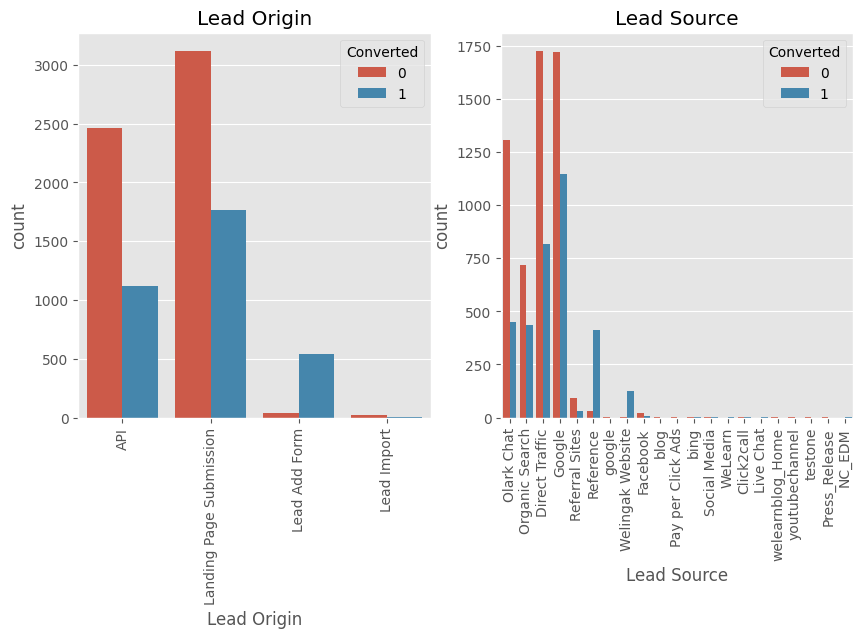

In [313]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= case_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= case_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

    OBSERVATION:
    • API and Landing Page Submission has less conversion rate(-30%) but counts of the case_df from them are considerable
    • The count of case_df from the Lead Add Form is pretty low but the conversion rate is very high
    • Lead Import has very less count as well as conversion rate and hence can be ignored
    To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the
    number of case_df from 'Lead Add Form'

In [314]:
# We can clearly observe that the count of case_df from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis
case_df['Lead Source'] = case_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press Release',
'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtube channel'], 'Other_Lead_Source')
case_df['Lead Source'] = case_df ['Lead Source'].replace("google", "Google")

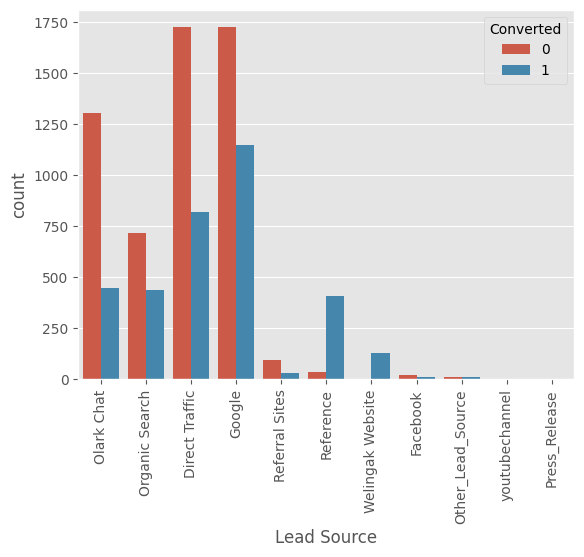

In [315]:
# Plotting Lead Source again
sns.countplot(x="Lead Source", hue="Converted", data = case_df)
plt.xticks (rotation='vertical')
plt.show()

    OBSERVATION:
    • The count of case_df from the Google and Direct Traffic is maximum
    • The conversion rate of the case_df from Reference and Welingak Website is maximum
    To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and
    also increasing the number of case_df from 'Reference' and 'Welingak Website'

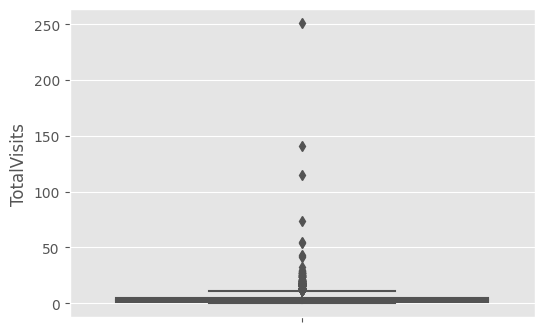

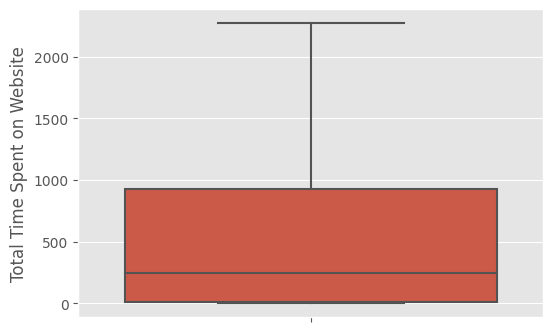

In [316]:
plt.figure(figsize=(6,4))
sns.boxplot(y=case_df['TotalVisits'])
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=case_df['Total Time Spent on Website'])
plt.show()

In [317]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile
q1 = case_df['TotalVisits'].quantile (0.95)
case_df ['TotalVisits'] [case_df ['TotalVisits'] >= q1] = q1

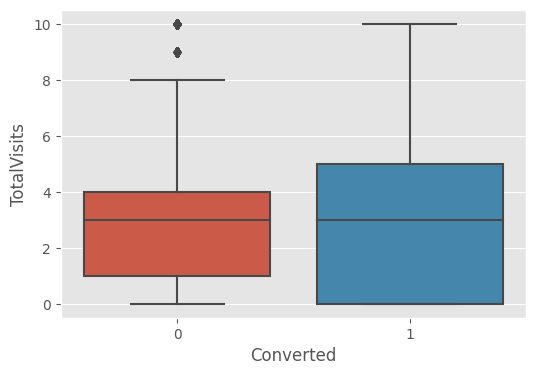

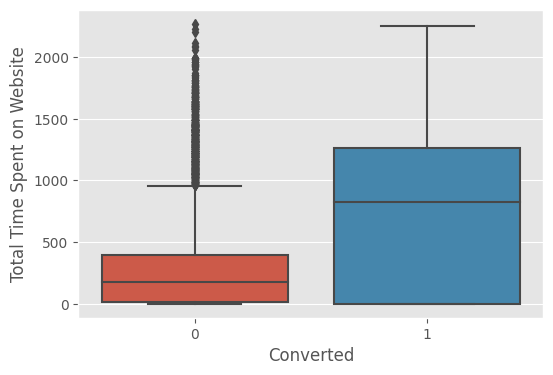

In [318]:
plt.figure(figsize=(6,4))
sns.boxplot(y=case_df['TotalVisits'], x = 'Converted', data = case_df)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=case_df['Total Time Spent on Website'], x = 'Converted', data = case_df)
plt.show()


    OBSERVATION:
    • The median of both the conversion and non-donversion are same and hence nothing conclusive can be said using this information
    • Users spending more time on the website are more likely to get converted
    Websites can be made more appealing so as to increase the time of the Users on websites

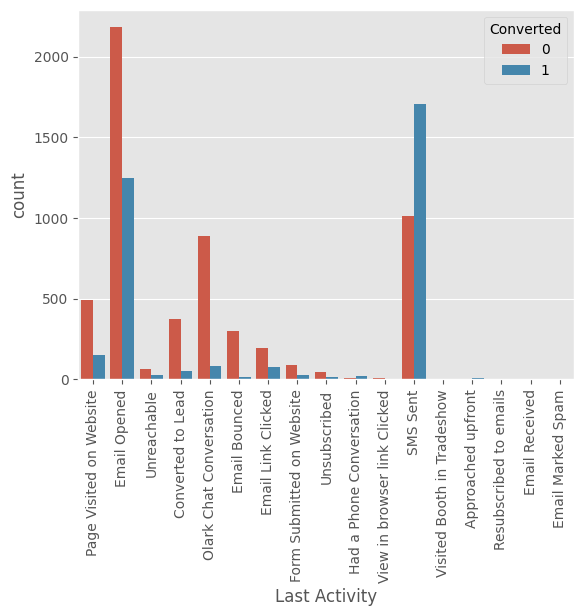

In [319]:
# Plotting the Last Activity again
sns.countplot(x="Last Activity", hue="Converted", data= case_df) 
plt.xticks(rotation="vertical")
plt.show()

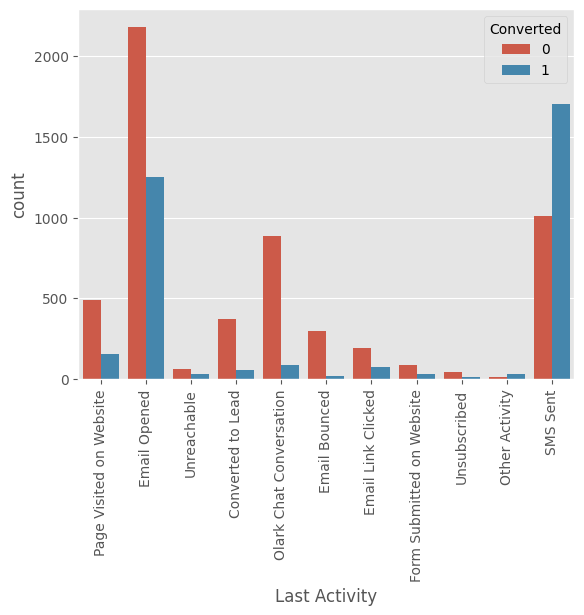

In [320]:
# Converting all the Low count categories to the 'Others' category 
case_df['Last Activity'] = case_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other Activity')
#Lets plot the Last Activity again
sns.countplot(x="Last Activity", hue="Converted", data= case_df) 
plt.xticks(rotation = 'vertical')
plt.show()

    OBSERVATION:
    • The count of Ist activity as "Email Opened" is max
    • The conversion rate of SMS sent as last activity is maximum
    We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those case_df and also try to increase the count of the ones having last activity as SMS sent

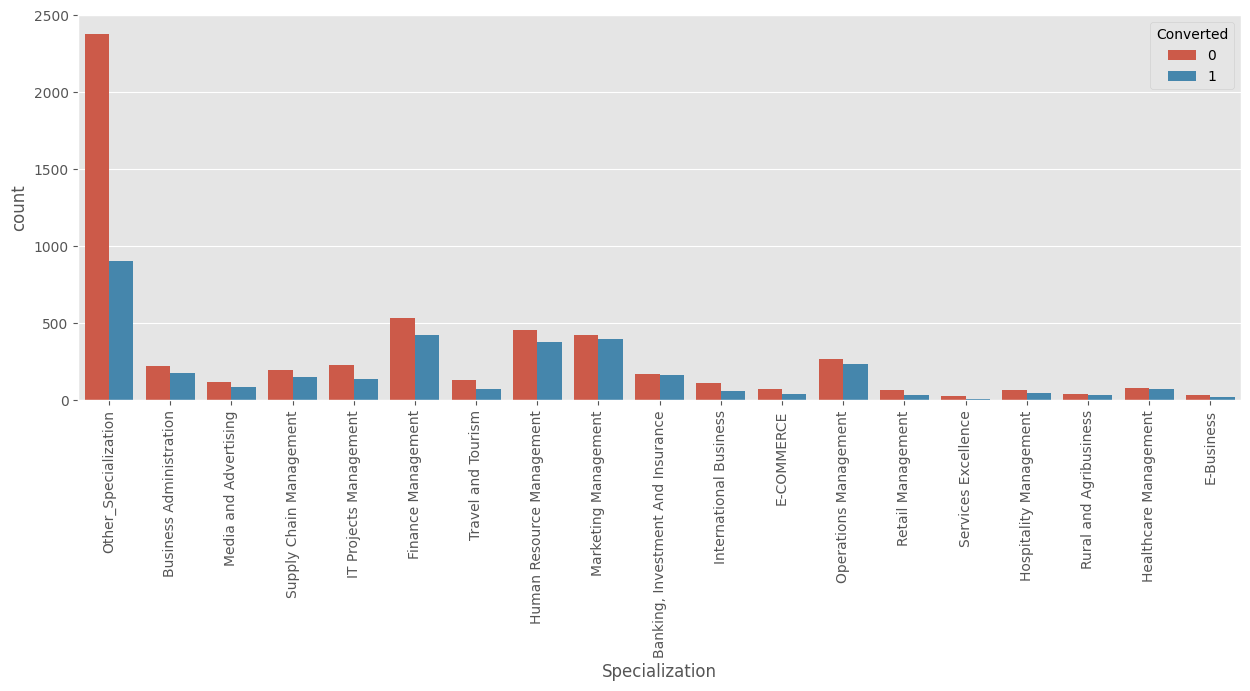

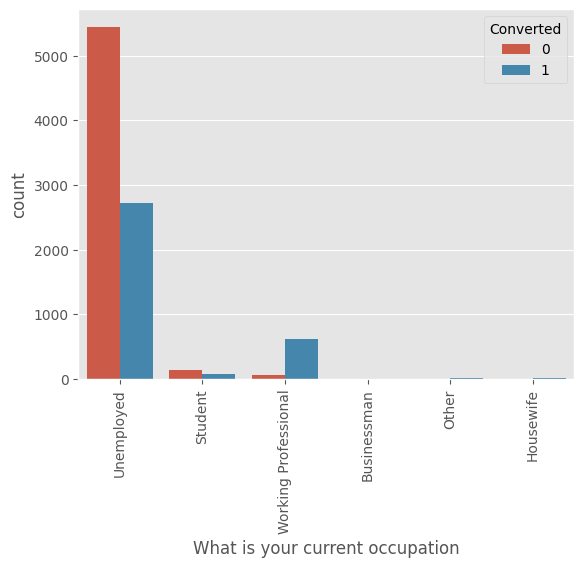

In [321]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x="Specialization", hue="Converted", data=case_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
#visualizing count of Variable based on Converted value
s1=sns.countplot(x="What is your current occupation", hue="Converted", data=case_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


    OBSERVATION:
    • Looking at above plot, no particular inference can be made for Specialization
    • Looking at above plot, we can say that working professionals have high conversion rate
    • Number of Unemployed leads are more than any other category
    To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as Linkedin etc. and also on increasing the conversion rate of Unemployed leads
    • Country, What matters most to you in choosing a course, City columns have most values corresponding to one value such as India for Country, Mumbai for city and hence there is no particular insights for these columns

In [322]:
case_df[ 'What is your current occupation'] = case_df[ 'What is your current occupation'].replace("Other", 'Other Occupation')

In [323]:
case_df [["Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


        OBSERVATION:
        • We can clearly see that most values in all the columns are 0 and hence no interference can be made using these colums

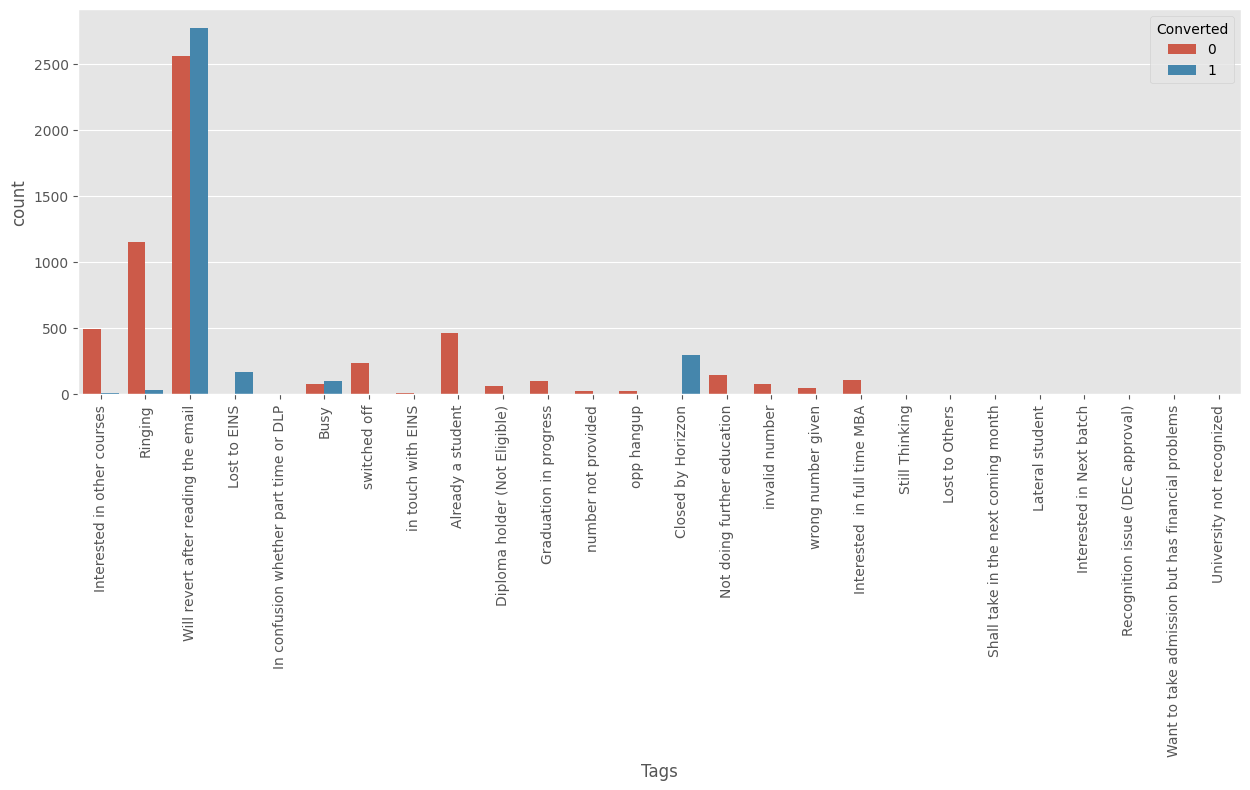

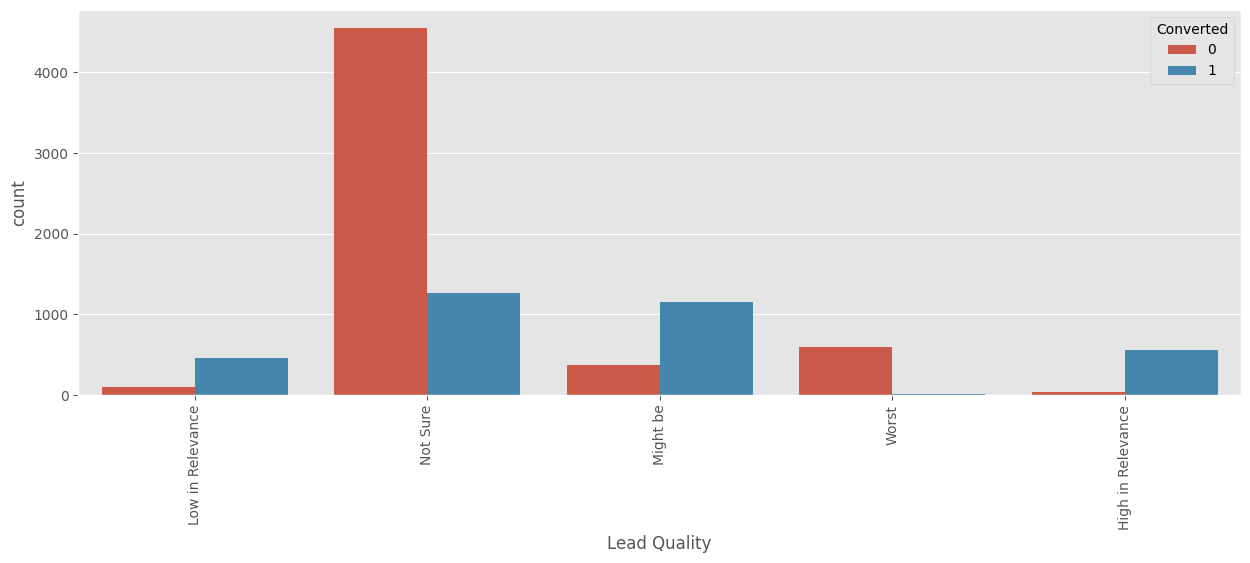

In [324]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x="Tags", hue="Converted", data=case_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
plt.figure(figsize=(15,5))
s1=sns.countplot(x="Lead Quality", hue="Converted", data=case_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

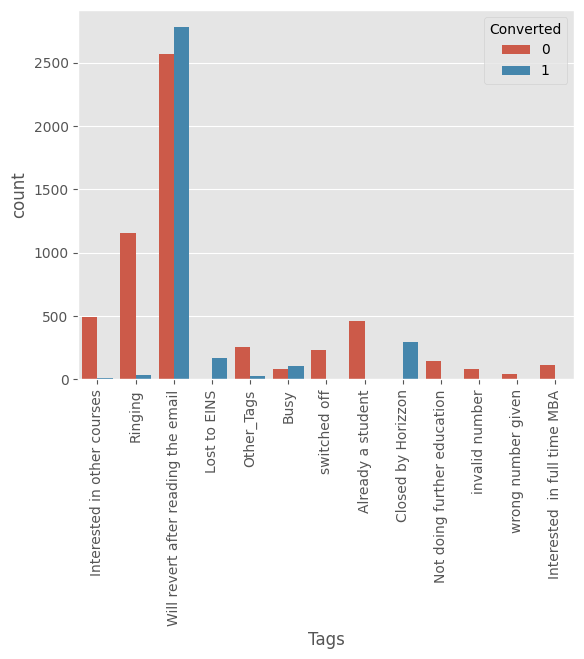

In [325]:
# Converting all low count categories to Others category
case_df['Tags'] = case_df [ 'Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)', 'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup', 'Still Thinking', 'Lost to Others', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch', 'Recognition issue (DEC approval)', 'Want to take admission but has financial problems',
'University not recognized'], 'Other_Tags')
#lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= case_df)
plt.xticks(rotation = 'vertical')
plt.show()

    OBSERVATION:
    • 'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

    SUMMARY:
    • To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'
    • To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'
    Websites can be made more appealing so as to increase the time of the Users on websites
    • We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent
    • To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as Linkedin etc. and also on increasing the conversion rate of Unemployed leads
    • We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

In [326]:
# Dropping unnecessary columns
case_df = case_df.drop(['Lead Number', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Country', 'Do Not Call'],1)
case_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


STEP 5: DUMMY Variable Creation

In [327]:
dummy = pd.get_dummies (case_df [[ 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'City', 'Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [328]:
case_df = case_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'City', 'Last Notable Activity'], axis=1)

case_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [329]:
case_df = pd.concat([case_df, dummy], axis=1)
case_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


STEP 6: Test-Train Split

In [330]:
# Putting feature variable to X
X = case_df.drop(['Prospect ID', 'Converted'], axis=1)
# Putting response variable to y
y = case_df[ 'Converted']
print(y)
X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [331]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

STEP 7: Feature Scaling

In [332]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train [['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [333]:
### Checking the Conversion Rate
print("Conversion rate is ", (sum(case_df['Converted'])/len (case_df[ 'Converted'].index))*100)

Conversion rate is  37.85541106458012


STEP 8: Looking at Correlations

In [334]:
# Correlation between different numerical variables for both the Converted and not-converted cases 
conv_corr = case_df.corr()
# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values (kind="quicksort")
conv_corr.where(np.triu (np.ones (conv_corr.shape), k=1).astype (np.bool)).stack().sort_values (ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64

In [335]:
# Dropping highly correlated features
X_test = X_test.drop(['Lead Source_Facebook', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Lead Source_Facebook', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website'], 1)
conv_corr = X_train.corr()
conv_corr.where(np. triu (np.ones(conv_corr.shape), k=1).astype (np.bool)).stack().sort_values (ascending=False).head (10)

Lead Origin_Lead Add Form     Lead Source_Reference                             0.859537
TotalVisits                   Page Views Per Visit                              0.756104
Do Not Email                  Last Activity_Email Bounced                       0.624939
Last Activity_Other Activity  Last Notable Activity_Had a Phone Conversation    0.593057
Lead Source_Olark Chat        Specialization_Other_Specialization               0.505771
Page Views Per Visit          Lead Origin_Landing Page Submission               0.493007
Lead Origin_Lead Add Form     Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced   Last Notable Activity_Email Bounced               0.450911
TotalVisits                   Lead Origin_Landing Page Submission               0.447765
Lead Source_Olark Chat        Last Activity_Olark Chat Conversation             0.419173
dtype: float64

STEP 9: Model Building

In [336]:
# Logistic regression model
logm1 = sm.GLM(y_train, (sm.add_constant (X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.4
Date:                Thu, 02 Mar 2023   Deviance:                       2550.8
Time:                        13:33:11   Pearson chi2:                 3.54e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6060
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9993      1.761      1.135      0.256      -1.453       5.452
Do Not Email                                            -1.3737      0.317     -4.331      0.000      -1.995      -0.752
TotalVisits                                              0.0699      0.085      0.820      0.412      -0.097       0.237
Total Time Spent on Website                              1.1464      0.063     18.109      0.000       1.022       1.270
Page Views Per Visit                                    -0.1209      0.085     -1.425      0.154      -0.287       0.045
Lead Origin_Landing Page Submission                     -1.0287      0.218     -4.710      0.000      -1.457      -0.601
Lead Origin_Lead Add Form                               -0.5221      1.348     -0.387      0.698      -3.164       2.120
Lead Origin_Lead Import                                  1.1773      0.820      1.436      0.151      -0.430       2.785
Lead Source_Google                                       0.1907      0.152      1.254      0.210      -0.107       0.489
Lead Source_Olark Chat                                   0.9989      0.227      4.395      0.000       0.553       1.444
Lead Source_Organic Search                               0.1886      0.206      0.914      0.361      -0.216       0.593
Lead Source_Other_Lead_Source                            1.1944      0.902      1.324      0.186      -0.574       2.963
Lead Source_Press_Release                              -21.6574   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Reference                                    1.9990      1.403      1.424      0.154      -0.752       4.750
Lead Source_Referral Sites                              -0.1239      0.490     -0.253      0.801      -1.085       0.837
Lead Source_Welingak Website                             5.7055      1.541      3.702      0.000       2.685       8.726
Lead Source_youtubechannel                             -23.7547   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Last Activity_Email Bounced                             -0.5905      0.880     -0.671      0.502      -2.315       1.134
Last Activity_Email Link Clicked                        -0.8419      0.458     -1.837      0.066      -1.740       0.056
Last Activity_Email Opened                              -0.4364      0.347     -1.256      0.209      -1.117       0.245
Last Activity_Form Submitted on Website                  0.1263      0.591      0.214      0.831      -1.031       1.284
Last Activity_Olark Chat Conversation                   -0.5798      0.392     -1.478      0.140      -1.349       0.189
Last Activity_Other Activity                             1

Step 10: Feature Selection Using RFE

In [337]:
# Starting with 15 features selected by RFE
#We will then optimize the model further by inspecting VIF and p-value of the features
logreg = LogisticRegression()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 55),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 53),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 48),
 ('Lead Source_Other_Lead_Source', False, 28),
 ('Lead Source_Press_Release', False, 62),
 ('Lead Source_Reference', False, 61),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_youtubechannel', False, 43),
 ('Last Activity_Email Bounced', False, 30),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 26),
 ('Last Activity_Form Submitted on Website', False, 52),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Other Activity', False, 6),
 ('Last Activity_Page Visited on Website', False, 

In [338]:
col=X_train.columns[rfe.support_]

    Assessing the model with Stats Models

In [339]:
X_train_sm=sm.add_constant (X_train[col]) 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1553.1
Date:                Thu, 02 Mar 2023   Deviance:                       3106.2
Time:                        13:33:15   Pearson chi2:                 4.04e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5700
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0794      0.217     -4.963      0.000      -1.506      -0.653
Do Not Email                                     -1.1895      0.221     -5.376      0.000      -1.623      -0.756
Lead Origin_Lead Add Form                         0.8693      0.366      2.372      0.018       0.151       1.587
Lead Source_Welingak Website                      3.2594      0.820      3.976      0.000       1.653       4.866
Last Activity_SMS Sent                            1.9538      0.103     19.039      0.000       1.753       2.155
Tags_Busy                                         3.4717      0.323     10.757      0.000       2.839       4.104
Tags_Closed by Horizzon                           8.4090      0.775     10.849      0.000       6.890       9.928
Tags_Lost to EINS                                 9.4298      0.766     12.317      0.000       7.929      10.930
Tags_Ringing                                     -1.9594      0.331     -5.911      0.000      -2.609      -1.310
Tags_Will revert after reading the email          3.6656      0.231     15.900      0.000       3.214       4.117
Tags_invalid number                             -22.4206   1.34e+04     -0.002      0.999   -2.62e+04    2.62e+04
Tags_switched off                                -2.5297      0.584     -4.331      0.000      -3.674      -1.385
Lead Quality_Not Sure                            -3.4872      0.130    -26.738      0.000      -3.743      -3.232
Lead Quality_Worst                               -3.9571      0.834     -4.745      0.000      -5.592      -2.323
Last Notable Activity_Modified                   -1.6959      0.107    -15.830      0.000      -1.906      -1.486
Last Notable Activity_Olark Chat Conversation    -1.3029      0.352     -3.699      0.000      -1.993      -0.612
=================================================================================================================
"""

In [340]:
# Getting the predicted values on the train set 
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.288839
1012    0.110023
9226    0.001892
4750    0.741307
7987    0.994066
1281    0.989439
2880    0.288839
4971    0.702437
7536    0.929965
1248    0.001892
dtype: float64

In [341]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28883901, 0.11002273, 0.00189224, 0.7413066 , 0.99406588,
       0.98943879, 0.28883901, 0.70243735, 0.92996485, 0.00189224])

    Creating a dataframe with the true convertion status and the predicted probabilities

In [342]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob' :y_train_pred}) 
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.288839,3009
1,0,0.110023,1012
2,0,0.001892,9226
3,1,0.741307,4750
4,1,0.994066,7987


In [343]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final ['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.288839,3009,0
1,0,0.110023,1012,0
2,0,0.001892,9226,0
3,1,0.741307,4750,1
4,1,0.994066,7987,1


In [344]:
print("Accuracy score", metrics.accuracy_score (y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9209573295544009


    Checking VIFs

In [345]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor (X_train.values, i) for i in range (X_train.shape[1])] 
    vif_df['Variance Inflation Factor'] = round(vif_df[ 'Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values (by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])


                                         Features  Variance Inflation Factor
11                          Lead Quality_Not Sure                       3.02
8        Tags_Will revert after reading the email                       2.70
13                 Last Notable Activity_Modified                       1.69
3                          Last Activity_SMS Sent                       1.63
1                       Lead Origin_Lead Add Form                       1.58
7                                    Tags_Ringing                       1.53
2                    Lead Source_Welingak Website                       1.35
5                         Tags_Closed by Horizzon                       1.17
0                                    Do Not Email                       1.13
12                             Lead Quality_Worst                       1.13
4                                       Tags_Busy                       1.11
10                              Tags_switched off                       1.10

In [346]:
col = col.drop('Tags_invalid number')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [347]:
# Let's re-run the model using the selected variables 
X_train_sm = sm.add_constant (X_train[col])
logm = sm. GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1559.1
Date:                Thu, 02 Mar 2023   Deviance:                       3118.3
Time:                        13:33:15   Pearson chi2:                 3.94e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5692
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2486      0.218     -5.725      0.000      -1.676      -0.821
Do Not Email                                     -1.1805      0.221     -5.350      0.000      -1.613      -0.748
Lead Origin_Lead Add Form                         0.9081      0.369      2.464      0.014       0.186       1.630
Lead Source_Welingak Website                      3.2182      0.820      3.923      0.000       1.611       4.826
Last Activity_SMS Sent                            1.9270      0.102     18.901      0.000       1.727       2.127
Tags_Busy                                         3.6495      0.322     11.338      0.000       3.019       4.280
Tags_Closed by Horizzon                           8.5559      0.776     11.031      0.000       7.036      10.076
Tags_Lost to EINS                                 9.5786      0.766     12.504      0.000       8.077      11.080
Tags_Ringing                                     -1.7714      0.330     -5.368      0.000      -2.418      -1.125
Tags_Will revert after reading the email          3.8317      0.231     16.579      0.000       3.379       4.285
Tags_switched off                                -2.3367      0.583     -4.008      0.000      -3.479      -1.194
Lead Quality_Not Sure                            -3.4792      0.130    -26.743      0.000      -3.734      -3.224
Lead Quality_Worst                               -3.9437      0.836     -4.720      0.000      -5.581      -2.306
Last Notable Activity_Modified                   -1.6821      0.107    -15.737      0.000      -1.892      -1.473
Last Notable Activity_Olark Chat Conversation    -1.3049      0.352     -3.706      0.000      -1.995      -0.615
=================================================================================================================
"""

In [348]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final [ 'Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final. Convert_Prob.map(lambda x: 1 if x > 0.5 else 0) 
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.289842,3009,0
1,0,0.111387,1012,0
2,0,0.001918,9226,0
3,1,0.737087,4750,1
4,1,0.993914,7987,1


In [349]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score (y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.920642418516769


        The accuracy is still practicay the same.

    Let's now check the VIFS again

In [350]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Quality_Not Sure,2.97
8,Tags_Will revert after reading the email,2.66
12,Last Notable Activity_Modified,1.68
3,Last Activity_SMS Sent,1.62
1,Lead Origin_Lead Add Form,1.58
7,Tags_Ringing,1.51
2,Lead Source_Welingak Website,1.35
5,Tags_Closed by Horizzon,1.17
0,Do Not Email,1.12
11,Lead Quality_Worst,1.12


        All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [351]:
# function name: evaluate_model
# argumet: y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity
def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix (y_true, y_predicted)
    # Predicted     not_converted converted
    # Actual
    # not_converted    TN           FP
    # converted        FN           TP
    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion [0,1] # false positives 
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score (y_true, y_predicted) 
    sensitivity_score = TP / float (TP+FN)
    specificity_score = TN / float (TN+FP)
    precision_sc = precision_score (y_true, y_predicted)

    if print_score:
        print("Confusion Matrix : \n", confusion)
        print("Accuracy", accuracy_sc)
        print("Sensitivity :", sensitivity_score) 
        print("Specificity", specificity_score)
        print("Precision :", precision_sc)
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [352]:
#Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix : 
 [[3761  144]
 [ 360 2086]]
Accuracy 0.920642418516769
Sensitivity : 0.8528209321340965
Specificity 0.963124199743918
Precision : 0.9354260089686098


(0.920642418516769, 0.8528209321340965, 0.963124199743918, 0.9354260089686098)

STEP 11: Plotting the ROC Curve

    An ROC curve shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
    • The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
    • The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.
    Here, our goal is to have achieve good sensitivity score

In [353]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve ( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )

    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend (loc = "lower right")
    plt.show()
    return None
    

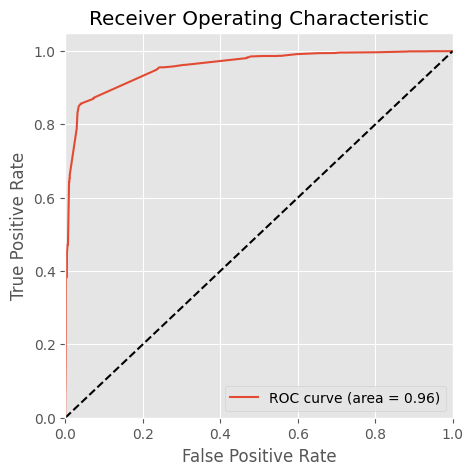

In [354]:
fpr, tpr, thresholds = metrics.roc_curve ( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

STEP 12: Finding Optimal Value of the Cut Off

In [355]:
# Predicting Convert status with different probability cutoffs
for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0) 
    
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.289842,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.111387,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.001918,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.737087,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.993914,7987,1,1,1,1,1,1,1,1,1,1,1


In [356]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.
df = pd.DataFrame (columns = ['probability_score', 'accuracy_score', 'sensitivity_score', 'specificity_score', 'precision_score'])
for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.807117,0.959526,0.711652,0.675785
0.2,0.2,0.820343,0.956664,0.734955,0.693333
0.3,0.3,0.905999,0.872445,0.927017,0.882183
0.4,0.4,0.919540,0.856092,0.959283,0.929427
0.5,0.5,0.920642,0.852821,0.963124,0.935426
0.6,0.6,0.920328,0.851594,0.963380,0.935759
0.7,0.7,0.920328,0.848324,0.965429,0.938914
0.8,0.8,0.861912,0.659853,0.988476,0.972875
0.9,0.9,0.856086,0.643500,0.989245,0.974010


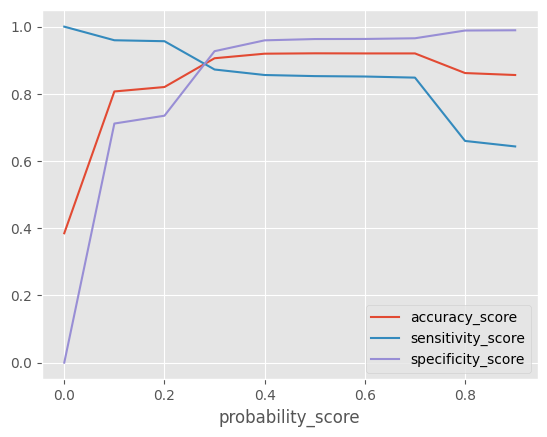

In [357]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

    Precision-Recall Trade off

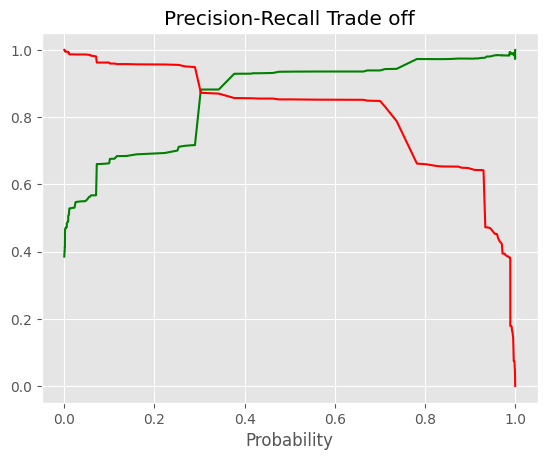

In [358]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

    In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal. In Precision-Recall Curve 0.3 looks optimal.

    We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [359]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.289842,3009,1,29
1,0,0.111387,1012,0,11
2,0,0.001918,9226,0,0
3,1,0.737087,4750,1,74
4,1,0.993914,7987,1,99


In [360]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix : 
 [[2987  918]
 [ 124 2322]]
Accuracy 0.8359313493937962
Sensitivity : 0.9493049877350777
Specificity 0.7649167733674775
Precision : 0.7166666666666667


(0.8359313493937962,
 0.9493049877350777,
 0.7649167733674775,
 0.7166666666666667)

In [361]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.289842,1,29
1,1,1490,0.929765,1,93
2,0,7936,0.289842,1,29
3,1,4216,0.998548,1,100
4,0,3830,0.289842,1,29


In [362]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix : 
 [[1303  431]
 [  71  918]]
Accuracy 0.8156445097319134
Sensitivity : 0.9282103134479271
Specificity 0.751441753171857
Precision : 0.6805040770941438


(0.8156445097319134, 0.9282103134479271, 0.751441753171857, 0.6805040770941438)

STEP 12 : Final Model

In [363]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [364]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.289842                  1          29
1         1012          0             0.111387                  0          11
2         9226          0             0.001918                  0           0
3         4750          1             0.737087                  1          74
4         7987          1             0.993914                  1          99
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.289842                  1          29
1         1490          1             0.929765                  1          93
2         7936          0             0.289842                  1          29
3         4216          1             0.998548                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.289842,1,29
1,1490,1,0.929765,1,93
2,7936,0,0.289842,1,29
3,4216,1,0.998548,1,100
4,3830,0,0.289842,1,29
...,...,...,...,...,...
2718,850,0,0.070553,0,7
2719,2879,0,0.001642,0,0
2720,6501,1,0.989122,1,99
2721,7155,0,0.070553,0,7


In [365]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                           -1.248649
Do Not Email                                    -1.180501
Lead Origin_Lead Add Form                        0.908052
Lead Source_Welingak Website                     3.218160
Last Activity_SMS Sent                           1.927033
Tags_Busy                                        3.649486
Tags_Closed by Horizzon                          8.555901
Tags_Lost to EINS                                9.578

CONCLUSION

    As opposed to predicting the value of the target variable directly, the logistic regression model predicts the probability of the target variable having a particular value.In order to calculate the predicted value of the variable, a cutoff is applied to the probability.

    In this case, a logistic regression model is used to predict the likelihood that a customer will convert.

    0.27 is chosen as the optimal cutoff, i.e. A Hot Lead is one with a probability greater than 0.27 of converting into a customer, and a Cold Lead is one with a probability less than 0.27 of converting into a customer.

    Our final Logistic Regression Model is built with 14 features.

    The final model includes the following features: 'Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation']

    According to the absolute value of their coefficient factors, the top three categorical/dummy variables are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, and ‘Lead Quality_Worst’. By encoding the original categorical variable ‘Tags’, we obtain ‘Tags_Lost to EINS’, and ‘Tags_Closed by Horizzon’.By encoding 'Lead Quality' as a categorical variable, 'Lead Quality_Worst' is obtained.

    Tags_Lost to EINS (Coefficient factor = 9.578632)

    Tags_Closed by Horizzon (Coefficient factor = 8.555901)

    Lead Quality_Worst (Coefficient factor =-3.943680)

    The final model has Sensitivity of 0.928, this means the model is able to predict 92% customers out of all the converted customers, (Positive conversion) correctly.

    The final model has Precision of 0.68, this means 68% of predicted hot leads are True Hot Leads

    Using training data, test data, and a cut-off, we have built a reusable code block that predicts Convert value and Lead Score.Use different cutoffs according to the use-case (for example, when high sensitivity is required, when precision is of utmost importance, etc.).
